In [1]:
import tensorflow as tf
import regressor as reg
import numpy as np
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
import pandas as pd

In [33]:
def show_some(data: pd.DataFrame):
    fig = plt.figure(figsize=(100,100))
    for i, fname in enumerate(data.sample(n=min(9,len(data)))['filename']):
        fig.add_subplot(3,3,i+1)
        img = cv2.imread(fname)
        img = reg.prep_img(img)
        plt.imshow(img)
        plt.scatter(img.shape[1]/2,img.shape[0]/2, c='red', marker='x')

In [3]:
df = reg.get_dataset_df('/data/staff/common/ML-crystals/csv/data_0.5.csv')

loading meta files
meta loaded


In [3]:
md = reg.build_model()

In [6]:
df.sample(n=3)

,filename,y,sample,scan,zoom
6169,/data/visitors/biomax/20180479/20181119/raw/Sa...,1,4-14,1,Zoom 5
938,/data/visitors/biomax/20180479/20181119/raw/Sa...,323,1-02,6,None
4875,/data/visitors/biomax/20180479/20181119/raw/Sa...,4,3-03,8,None


In [ ]:
# high scoring images
show_some(df.sort_values('y', ascending=False))    

/home/isak/.conda/envs/venv/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/isak/.conda/envs/venv/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


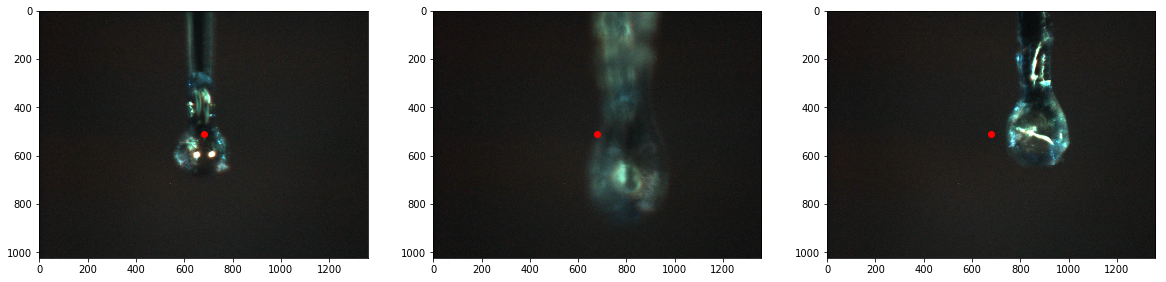

In [46]:
# low scoring images
fig = plt.figure(figsize=(20,50))
for i, fname in enumerate(df.sort_values('y', ascending=True)[0:3]['filename']):
    fig.add_subplot(1,3,i+1)
    img = cv2.imread('/data'+fname[4:])
    plt.imshow(img)
    plt.scatter(img.shape[1]/2,img.shape[0]/2, c='red')


array([[[15, 13, 13],
        [15, 13, 13],
        [15, 13, 13],
        ...,
        [12, 11, 15],
        [12, 11, 15],
        [12, 11, 15]],

       [[15, 13, 13],
        [15, 13, 13],
        [16, 14, 14],
        ...,
        [11, 10, 14],
        [11, 10, 14],
        [10,  9, 13]],

       [[14, 12, 12],
        [15, 13, 13],
        [15, 13, 13],
        ...,
        [11, 10, 12],
        [10,  9, 11],
        [ 9,  8, 10]],

       ...,

       [[13, 11, 11],
        [13, 11, 11],
        [14, 12, 12],
        ...,
        [10, 12, 13],
        [12, 11, 15],
        [13, 12, 16]],

       [[10,  8,  8],
        [12, 10, 10],
        [13, 11, 11],
        ...,
        [ 9, 11, 12],
        [11, 10, 14],
        [11, 10, 14]],

       [[ 7,  5,  5],
        [10,  8,  8],
        [12, 10, 10],
        ...,
        [ 9, 11, 12],
        [10,  9, 13],
        [10,  9, 13]]], dtype=uint8)